In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

from src.pbn_gen import PbnGen

def getNewPBNs(count, imagePath="images/red_panda.jpg"):
    return [PbnGen(imagePath) for x in range(count)]

def getNewImages(count, imagePath="images/red_panda.jpg") -> np.ndarray:
    bgr_image = cv2.imread(imagePath)
    # change to RGB
    image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)
    return [image for _ in range(count)]

Quantized to 14 colors
Quantized to 14 colors
Quantized to 14 colors
uint8
uint8
uint8
Plotting raw blurs


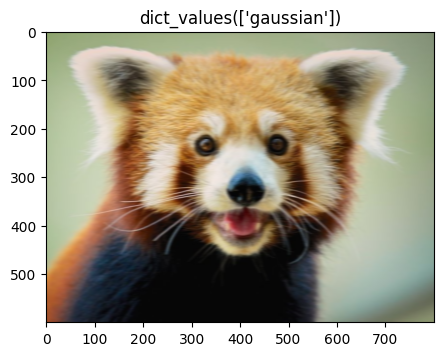

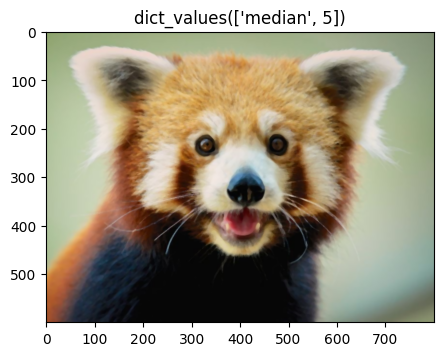

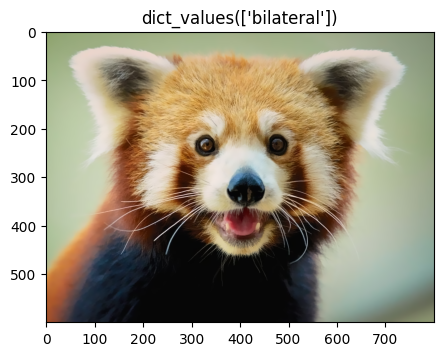

Plotting clustered results
uint8


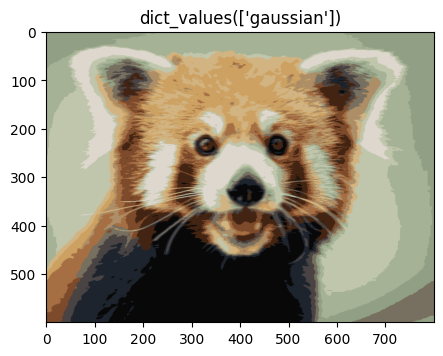

uint8


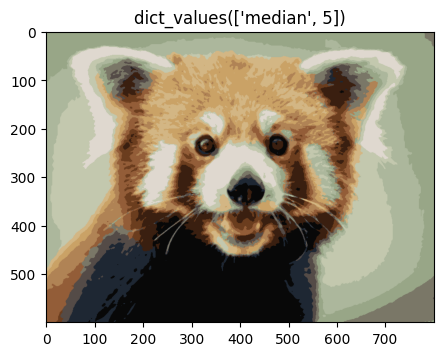

uint8


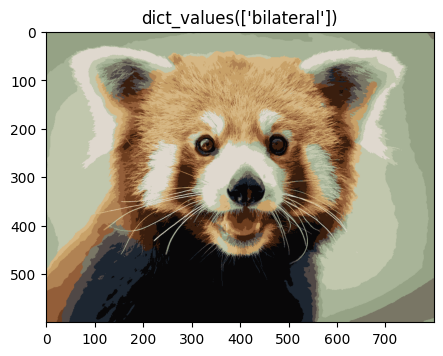

In [3]:
pbns = getNewPBNs(3)


blurFuncs = [
    ('blurImage_', {'blurType': 'gaussian'}),
    ('blurImage_', {'blurType': 'median', 'ksize': 5}),
    ('blurImage_', {'blurType': 'bilateral'}) 
]


for pbnObj, (func, args) in zip(pbns, blurFuncs):
    getattr(pbnObj, func)(**args)
    pbnObj.title = args.values()
    print(pbnObj.image.dtype)

print('Plotting raw blurs')
[obj.showImg(obj.title, figsize=(5, 5)) for obj in pbns]

print('Plotting clustered results')
for pbn in pbns:
    colors, labels, q_img = pbn.cluster_colors()
    q_img = (q_img*255).astype(np.uint8)
    print(q_img.dtype)
    
    pbn.setImage(q_img)

    pbn.showImg(title=pbn.title, figsize=(5, 5))
    
    # plt.imshow(q_img), plt.title(pbn.title)
    # plt.show()

## Compare smart vs simple pruning methods with different arguments below. The smart methods can take longer to run, but still produce similar results

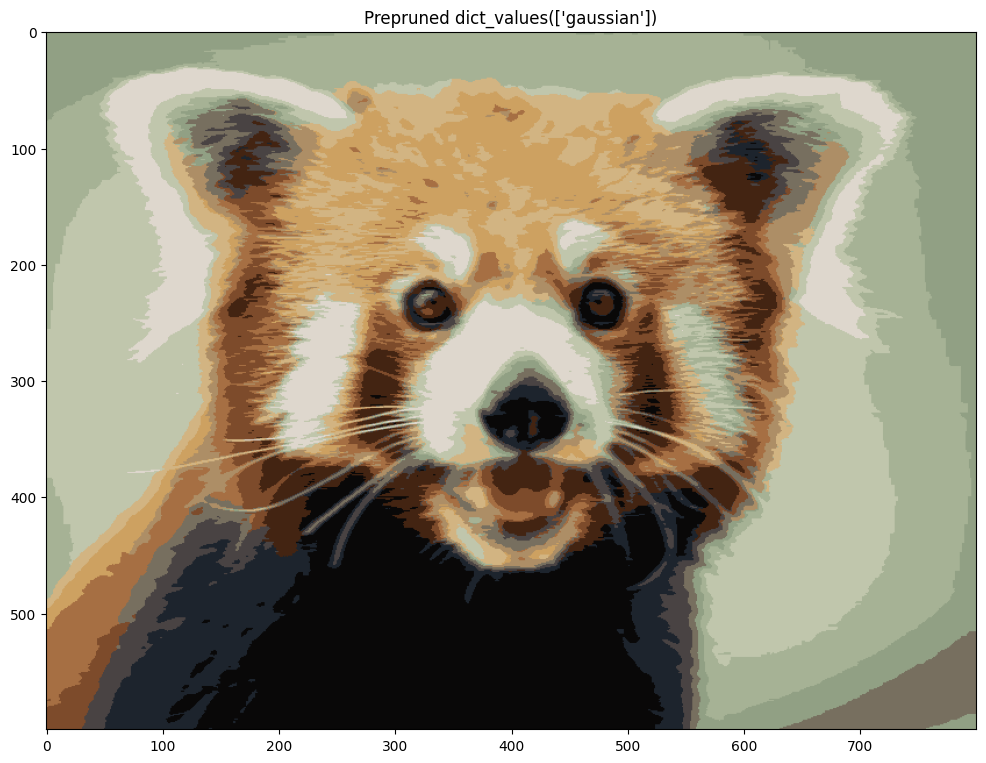

Prune Clusters Simple
Starting pruning... 
Iteration (of 3): 1 2 3 
Done!


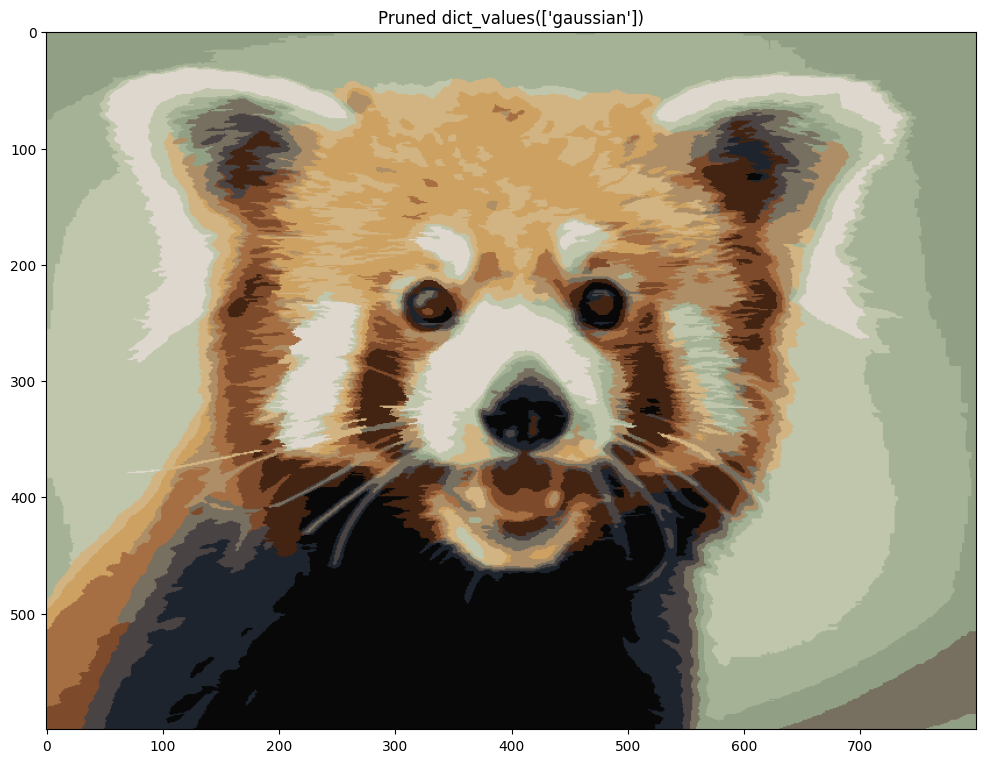

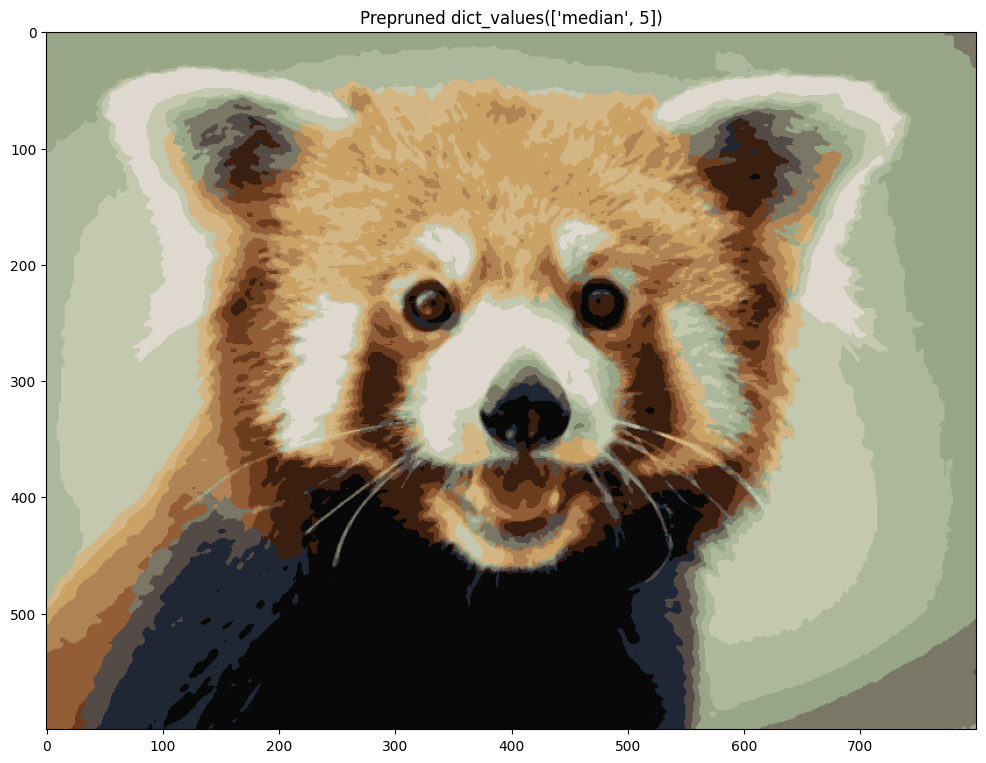

Prune Clusters Simple
Starting pruning... 
Iteration (of 3): 1 2 3 
Done!


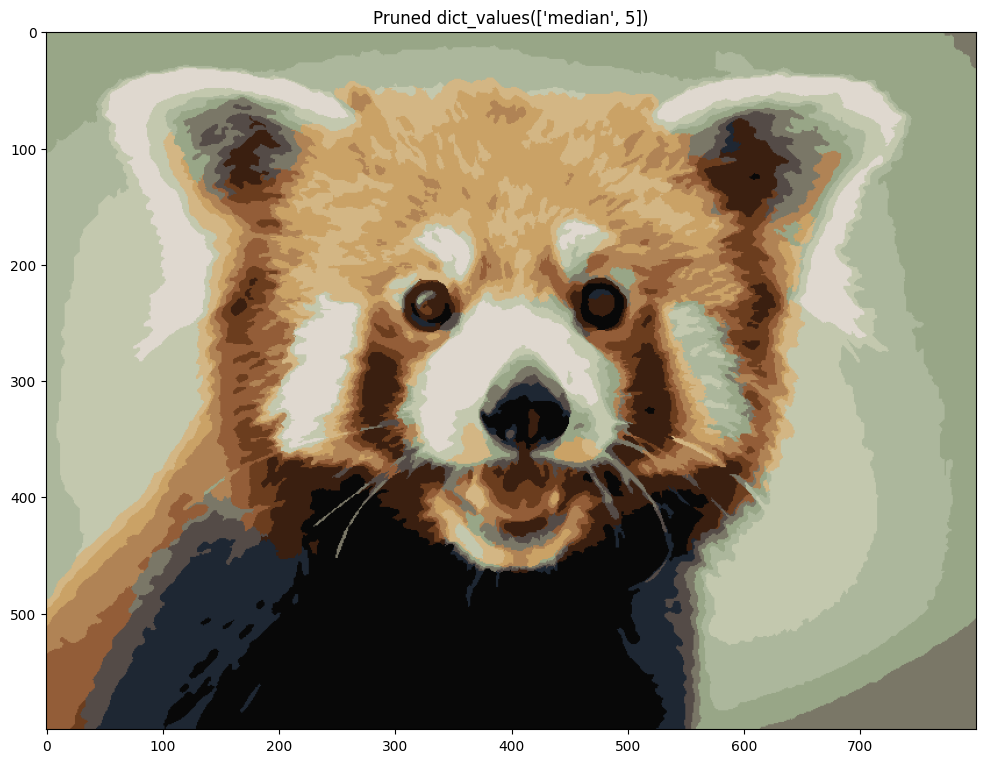

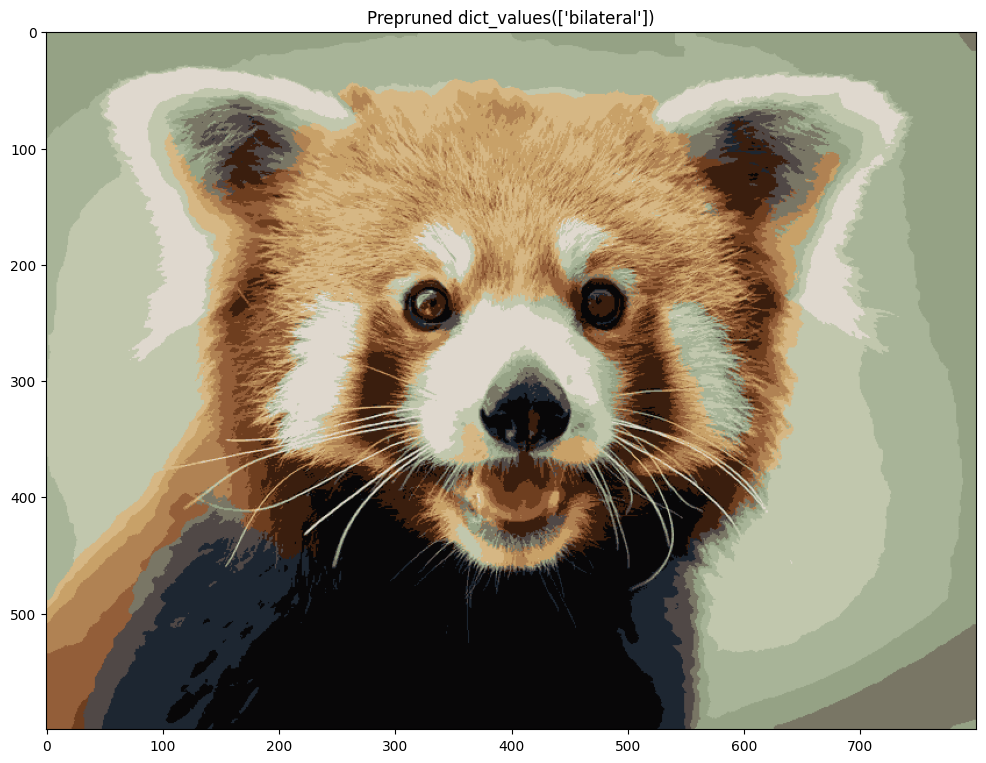

Prune Clusters Simple
Starting pruning... 
Iteration (of 3): 1 2 3 
Done!


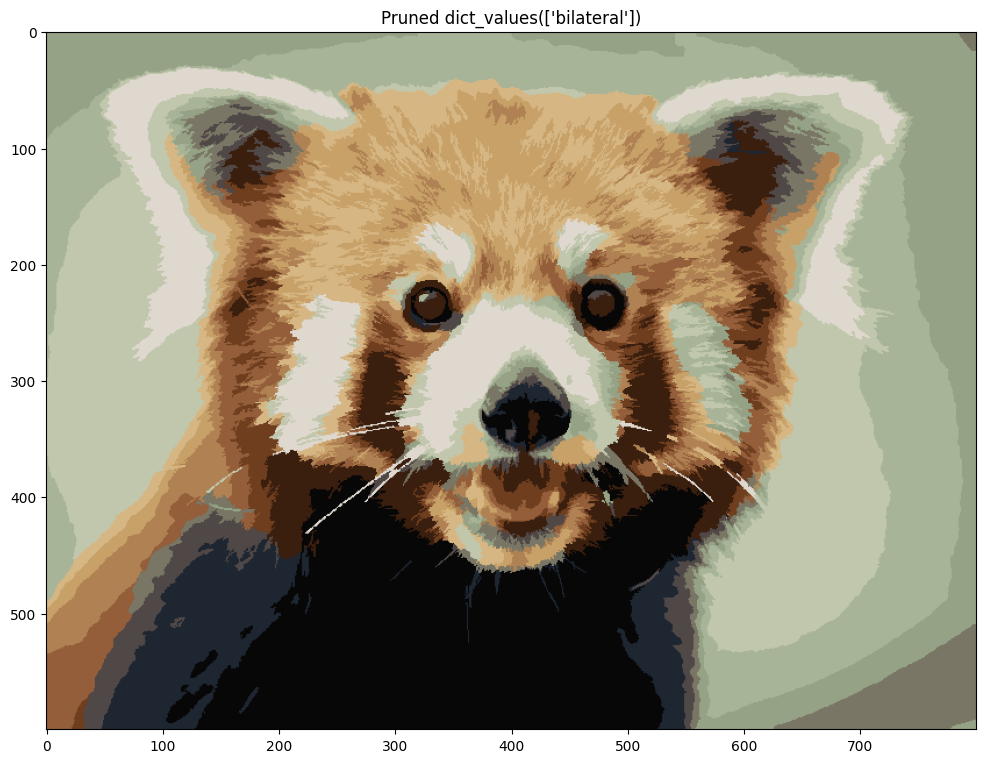

In [4]:

cPbn = pbns[0]

for cPbn in pbns:

    cPbn.showImg(title=f'Prepruned {cPbn.title}')
    print('Prune Clusters Simple')
    cPbn.pruneClustersSimple()
    cPbn.showImg(title=f'Pruned {cPbn.title}')


uint8
uint8
uint8
Prune Clusters Smart


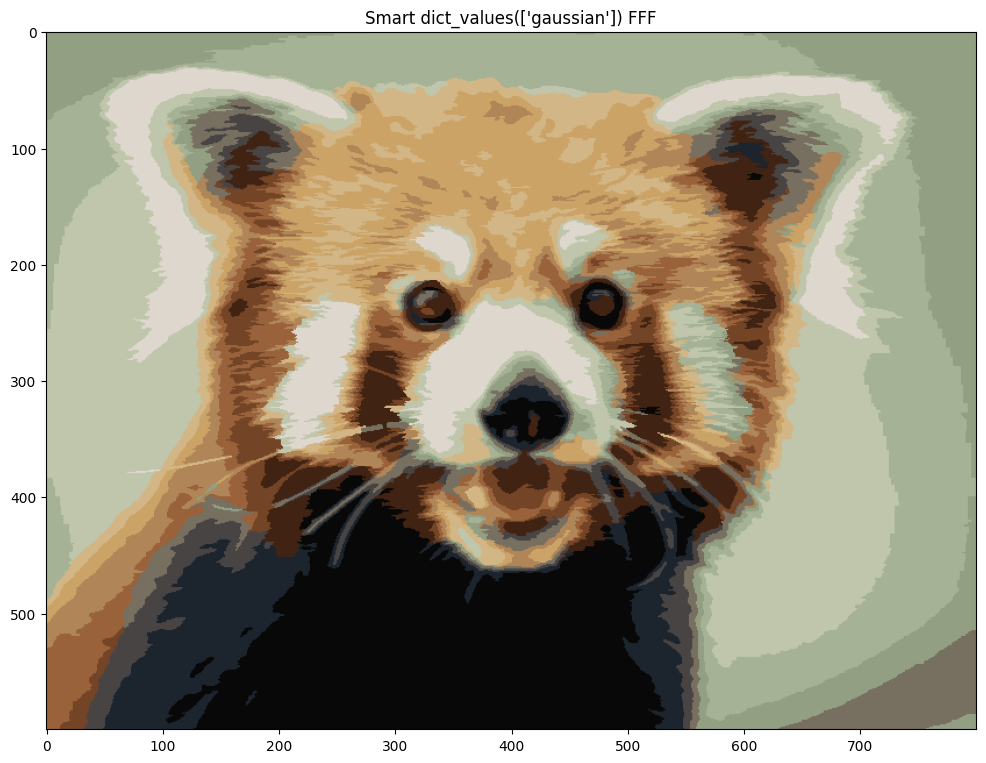

uint8
uint8
uint8
Prune Clusters Smart


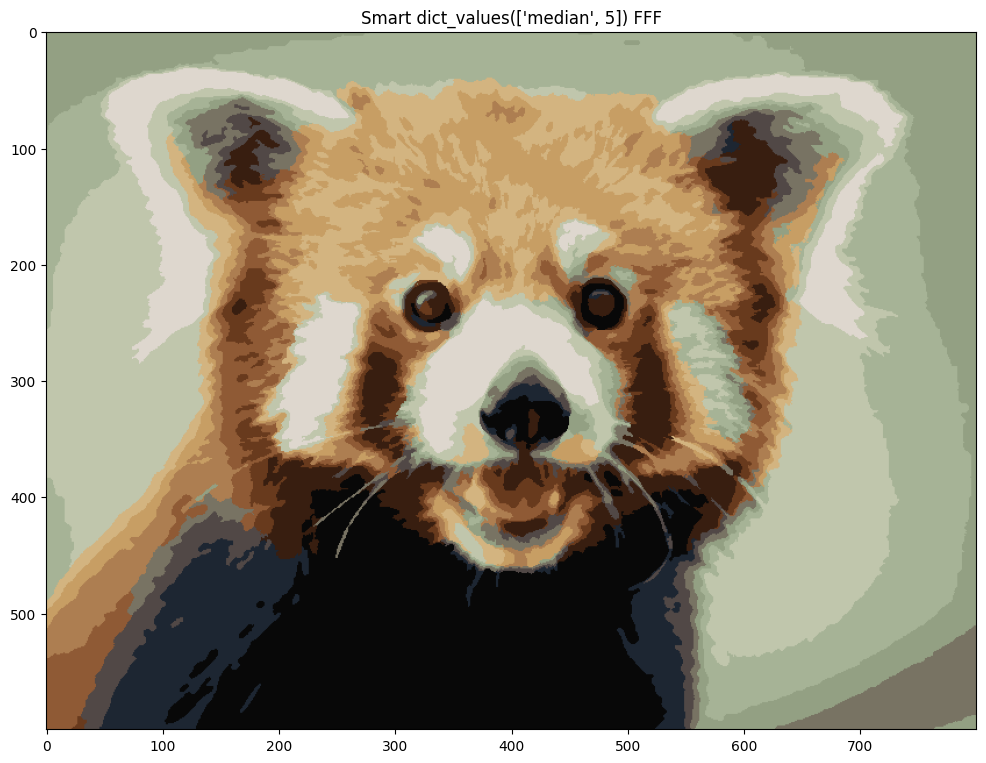

uint8
uint8
uint8
Prune Clusters Smart


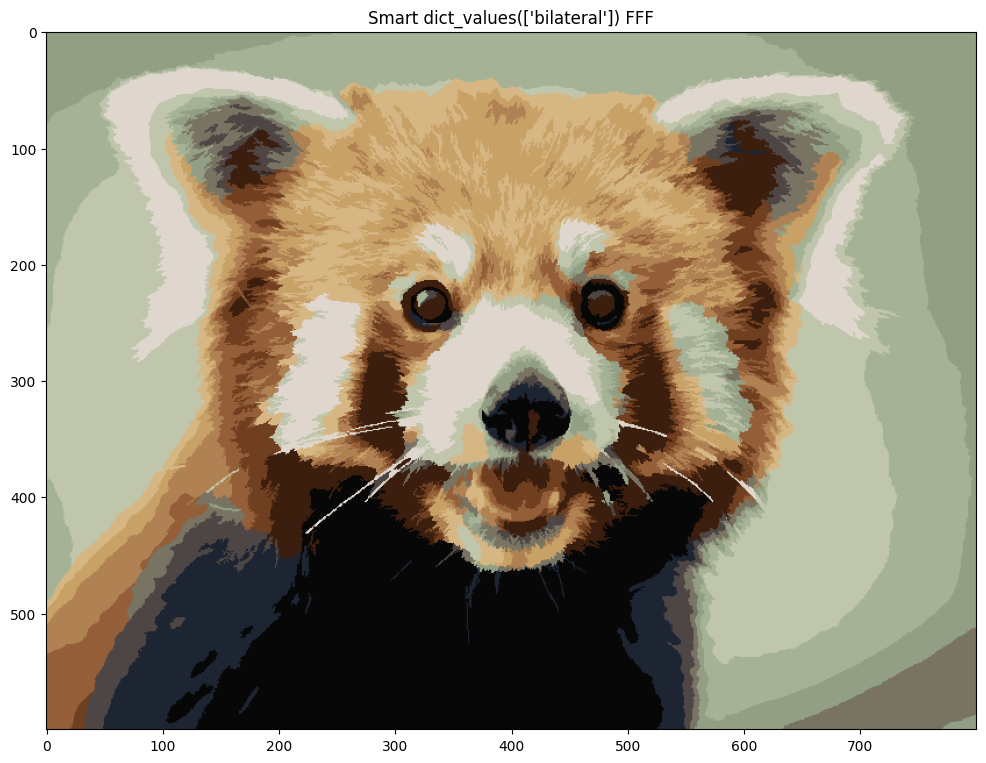

In [5]:


for cPbn in pbns:

    cPbn.resetImage()

    # cPbn.blurImage_(blurType='gaussian')

    for pbnObj, (func, args) in zip(pbns, blurFuncs):
        getattr(pbnObj, func)(**args)
        pbnObj.title = args.values()
        print(pbnObj.image.dtype)

    cPbn.cluster_colors_()

    print('Prune Clusters Smart')
    cPbn.pruneClustersSmart(pruneBySize=False, reversePruneBySize=False, reversePruneByIntensity=False)
    cPbn.showImg(title=f'Smart {cPbn.title} FFF')

    smartImage = cPbn.getImage()

uint8
uint8
uint8
Prune Clusters Smart


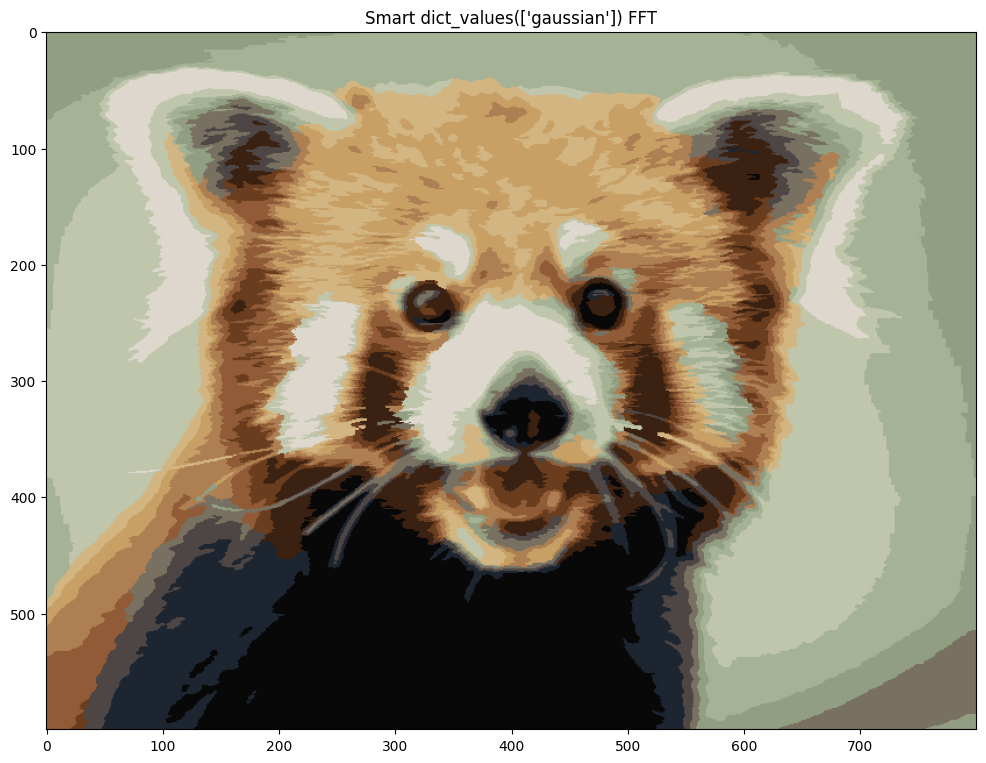

uint8
uint8
uint8
Prune Clusters Smart


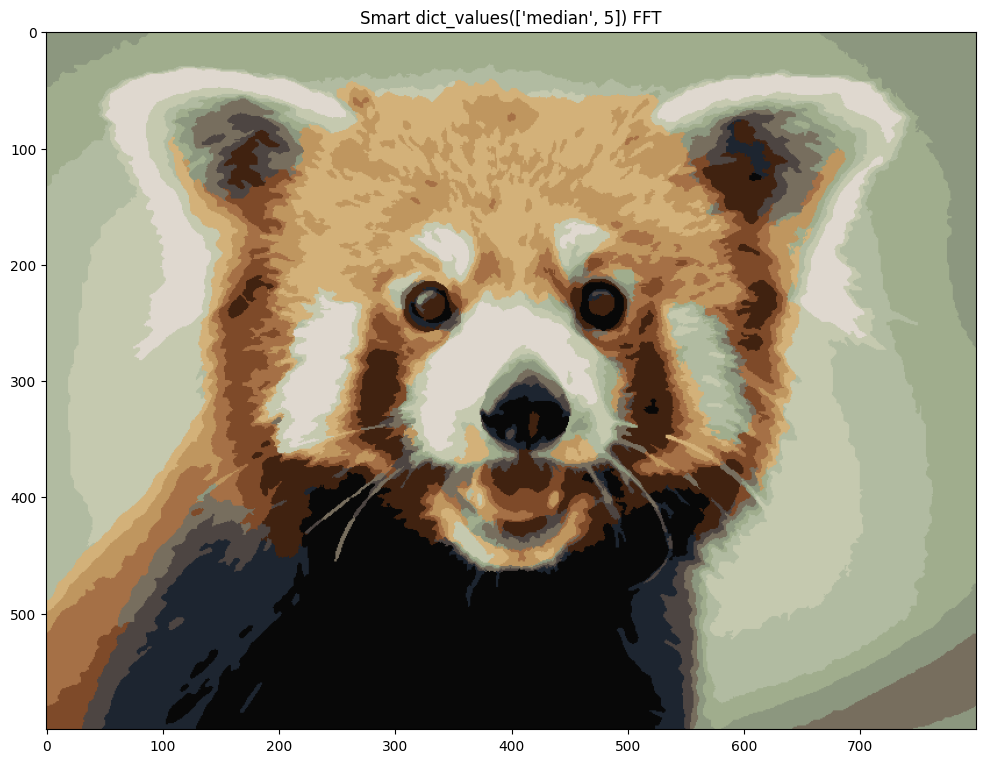

uint8
uint8
uint8
Prune Clusters Smart


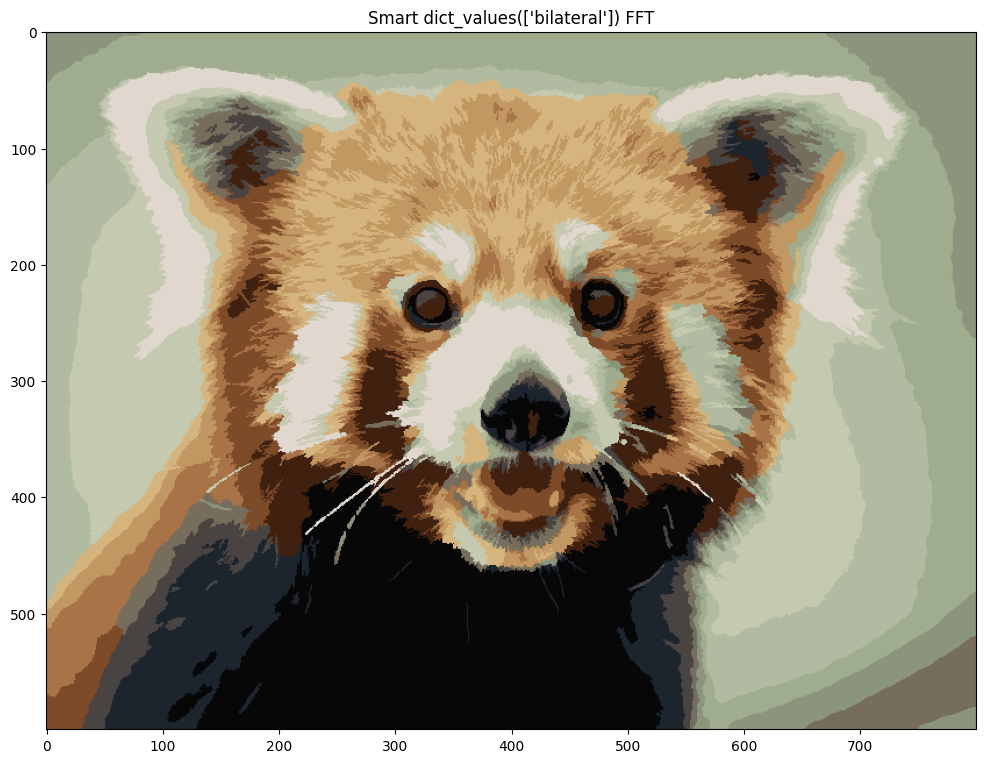

In [6]:
for cPbn in pbns:

    cPbn.resetImage()

    # cPbn.blurImage_(blurType='gaussian')

    for pbnObj, (func, args) in zip(pbns, blurFuncs):
        getattr(pbnObj, func)(**args)
        pbnObj.title = args.values()
        print(pbnObj.image.dtype)

    cPbn.cluster_colors_()

    print('Prune Clusters Smart')
    cPbn.pruneClustersSmart(pruneBySize=False, reversePruneBySize=False, reversePruneByIntensity=True)
    cPbn.showImg(title=f'Smart {cPbn.title} FFT')

    smartImage = cPbn.getImage()